In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from termcolor import colored
import copy

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import os
import pandas as pd

Emil = True

if Emil:
    base_path = r"C:\Users\ASUS\Documents\11. sem - kand\EV data"
else:
    base_path = r"C:\Users\Gustav\Documents\Thesis\data\EV"



In [3]:
EV1 = pd.read_csv(os.path.join(base_path, "CD_1544.csv"))
EV2 = pd.read_csv(os.path.join(base_path, "CD_2067.csv"))

In [4]:
EV1.head(3)

,energy_resovior (%),power(kW),connected (1 or 0),max_effect of charger (kW),minute of year
0,0.0,0.0,0.0,22.08,1.0
1,0.0,0.0,0.0,22.08,2.0
2,0.0,0.0,0.0,22.08,3.0


In [172]:
len(EV1)

525600

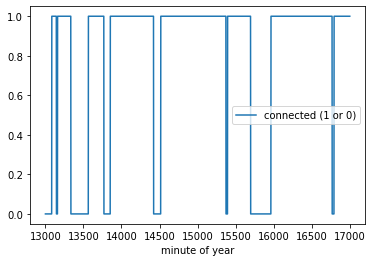

In [5]:
EV1[13000:17000].plot(x="minute of year", y="connected (1 or 0)");

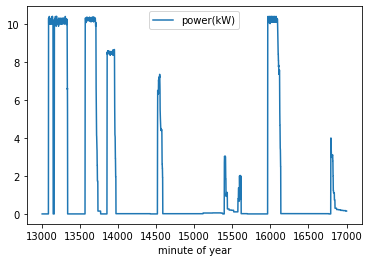

In [6]:
EV1[13000:17000].plot(x="minute of year", y="power(kW)");

In [7]:
# til at lave de op og nedregulerings bounds

liste_up = []
liste_down = []

for i in range(15392, 15697):
    if EV1['power(kW)'][i] == 0:
        liste_up.append(0)
        liste_down.append(0)
    elif EV1['power(kW)'][i] <= EV1['max_effect of charger (kW)'][i]-EV1['power(kW)'][i]:
        liste_up.append(EV1['power(kW)'][i]*5)
        liste_down.append(0)
    else:
        liste_up.append(EV1['power(kW)'][i])
        liste_down.append(EV1['power(kW)'][i]*5)


In [8]:
len(liste_up)

305

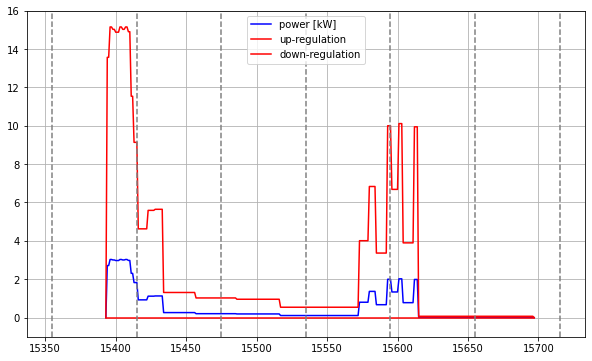

In [9]:
x  = EV1[15392:15697]["minute of year"].values
y1 = EV1[15392:15697]["power(kW)"].values
y2 = EV1[15392:15697]["energy_resovior (%)"].values
y3 = EV1[15392:15697]["connected (1 or 0)"].values

plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='power [kW]', color='blue')
#plt.plot(x, y2*10, label='energy_resovior (%)', color='green')
#plt.plot(x, y3, label='conncted', color='yellow')
plt.plot(x, liste_up, label='up-regulation', color='red')
plt.plot(x, liste_down, label='down-regulation', color='red')


# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15355, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)
#plt.axvline(x=15392, color='yellow', linestyle='-')
#plt.axvline(x=15697, color='yellow', linestyle='-')

# Show the plot
plt.grid(True)
plt.show()

The assumption is that a car will have 20% capacity when it connects to the charger and 80% when it's done.

It's also assumed that the operator is allowed to operate the battery between the battery capacity threshold 10-90% 

## Til møde 13/9

# plot 1

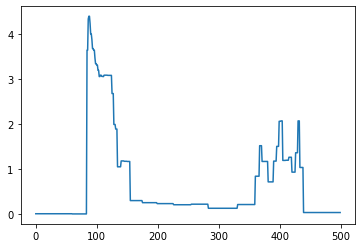

In [282]:
plt.plot(EV1[488100:488600]["power(kW)"].values)

In [45]:
print("1st hour interval: Max_power:", max(EV1[15360:15420]['power(kW)']), ", Min_power:", min(EV1[15360:15420]['power(kW)'])) 
print("2nd hour interval: Max_power:", max(EV1[15420:15480]['power(kW)']), ", Min_power:", min(EV1[15420:15480]['power(kW)']))
print("3rd hour interval: Max_power:", max(EV1[15480:15540]['power(kW)']), ", Min_power:", min(EV1[15480:15540]['power(kW)'])) 
print("4th hour interval: Max_power:", max(EV1[15540:15600]['power(kW)']), ", Min_power:", min(EV1[15540:15600]['power(kW)'])) 
print("5th hour interval: Max_power:", max(EV1[15600:15660]['power(kW)']), ", Min_power:", min(EV1[15600:15660]['power(kW)'])) 
print("6th hour interval: Max_power:", max(EV1[15660:15720]['power(kW)']), ", Min_power:", min(EV1[15660:15720]['power(kW)'])) 

1st hour interval: Max_power: 3.0299999939428197 , Min_power: 0.0
2nd hour interval: Max_power: 1.1291925443257127 , Min_power: 0.2050113891116065
3rd hour interval: Max_power: 0.2050113891116065 , Min_power: 0.10823812365604
4th hour interval: Max_power: 1.9999999959994377 , Min_power: 0.10823812365604
5th hour interval: Max_power: 2.022471906066944 , Min_power: 0.0138517618191978
6th hour interval: Max_power: 0.0138517618191978 , Min_power: 0.0


In [46]:
print("1st hour interval: Max_power:", EV1[15360:15420]['power(kW)'].idxmax(), ", Min_power:", EV1[15360:15420]['power(kW)'].idxmin()) 
print("2nd hour interval: Max_power:", EV1[15420:15480]['power(kW)'].idxmax(), ", Min_power:", EV1[15420:15480]['power(kW)'].idxmin())
print("3rd hour interval: Max_power:", EV1[15480:15540]['power(kW)'].idxmax(), ", Min_power:", EV1[15480:15540]['power(kW)'].idxmin()) 
print("4th hour interval: Max_power:", EV1[15540:15600]['power(kW)'].idxmax(), ", Min_power:", EV1[15540:15600]['power(kW)'].idxmin()) 
print("5th hour interval: Max_power:", EV1[15600:15660]['power(kW)'].idxmax(), ", Min_power:", EV1[15600:15660]['power(kW)'].idxmin()) 
print("6th hour interval: Max_power:", EV1[15660:15720]['power(kW)'].idxmax(), ", Min_power:", EV1[15660:15720]['power(kW)'].idxmin()) 

1st hour interval: Max_power: 15402 , Min_power: 15372
2nd hour interval: Max_power: 15427 , Min_power: 15456
3rd hour interval: Max_power: 15480 , Min_power: 15516
4th hour interval: Max_power: 15592 , Min_power: 15540
5th hour interval: Max_power: 15600 , Min_power: 15614
6th hour interval: Max_power: 15660 , Min_power: 15696


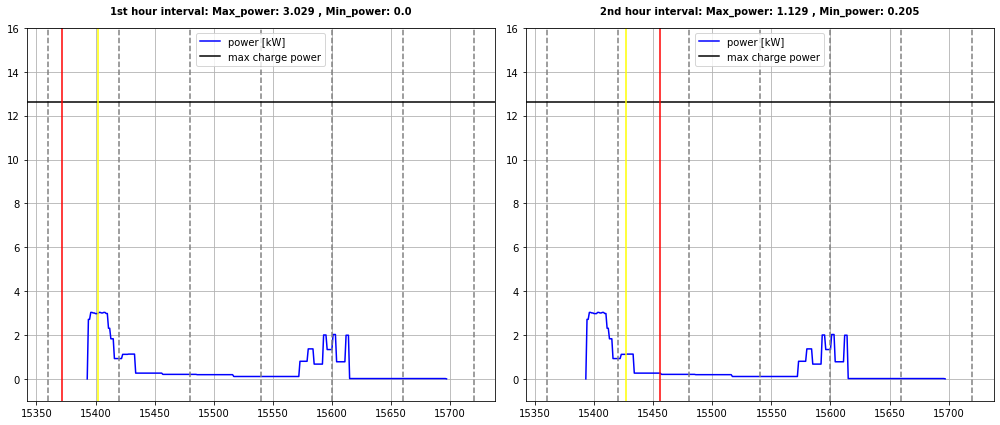

In [91]:
x  = EV1[15392:15697]["minute of year"].values
y1 = EV1[15392:15697]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y1, label='power [kW]', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.axhline(y=max(EV1["power(kW)"].values), label='max charge power', color='black', linestyle='-')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)

# max values in a given hour
plt.axvline(x=EV1[15360:15420]['power(kW)'].idxmax(), color='yellow', linestyle='-')

# min values in a given hour
plt.axvline(x=EV1[15360:15420]['power(kW)'].idxmin(), color='red', linestyle='-')

# title
plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(x, y1, label='power [kW]', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.axhline(y=max(EV1["power(kW)"].values), label='max charge power', color='black', linestyle='-')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)

# max values in a given hour
plt.axvline(x=EV1[15420:15480]['power(kW)'].idxmax(), color='yellow', linestyle='-')

# min values in a given hour
plt.axvline(x=EV1[15420:15480]['power(kW)'].idxmin(), color='red', linestyle='-')

# title
plt.title("2nd hour interval: Max_power: 1.129 , Min_power: 0.205", y=1.02, fontsize=10, fontweight='bold')

# grid
plt.grid(True)


# Show the plot
plt.tight_layout()
plt.show()

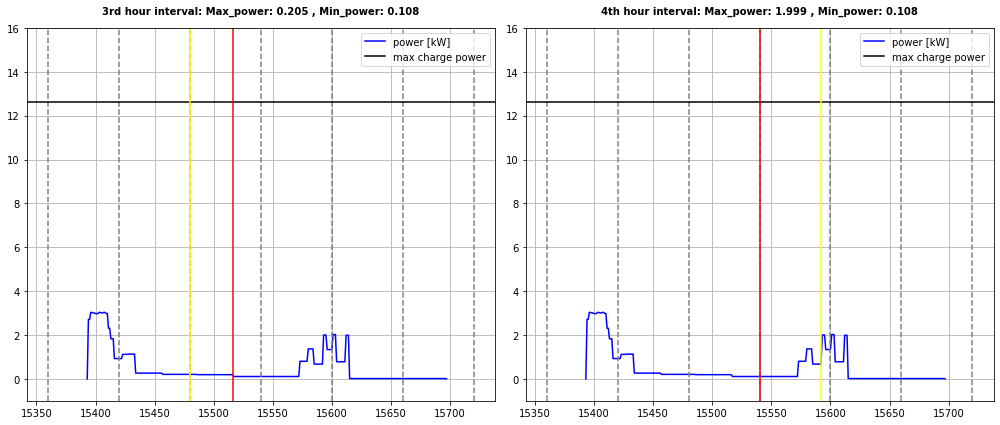

In [84]:
x  = EV1[15392:15697]["minute of year"].values
y1 = EV1[15392:15697]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y1, label='power [kW]', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.axhline(y=max(EV1["power(kW)"].values), label='max charge power', color='black', linestyle='-')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)

# max values in a given hour
plt.axvline(x=EV1[15480:15540]['power(kW)'].idxmax(), color='yellow', linestyle='-')

# min values in a given hour
plt.axvline(x=EV1[15480:15540]['power(kW)'].idxmin(), color='red', linestyle='-')

# title
plt.title("3rd hour interval: Max_power: 0.205 , Min_power: 0.108", y=1.02, fontsize=10, fontweight='bold')

# grid
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(x, y1, label='power [kW]', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.axhline(y=max(EV1["power(kW)"].values), label='max charge power', color='black', linestyle='-')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)

# max values in a given hour
plt.axvline(x=EV1[15540:15600]['power(kW)'].idxmax(), color='yellow', linestyle='-')

# min values in a given hour
plt.axvline(x=EV1[15540:15600]['power(kW)'].idxmin(), color='red', linestyle='-')

# title
plt.title("4th hour interval: Max_power: 1.999 , Min_power: 0.108", y=1.02, fontsize=10, fontweight='bold')

# grid
plt.grid(True)


# Show the plot
plt.tight_layout()
plt.show()

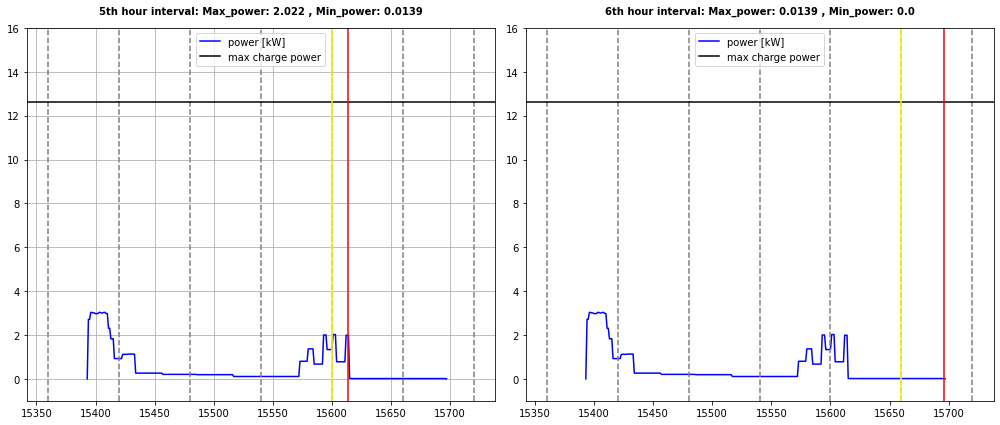

In [214]:
x  = EV1[15392:15697]["minute of year"].values
y1 = EV1[15392:15697]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y1, label='power [kW]', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.axhline(y=max(EV1["power(kW)"].values), label='max charge power', color='black', linestyle='-')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)

# max values in a given hour
plt.axvline(x=EV1[15600:15660]['power(kW)'].idxmax(), color='yellow', linestyle='-')

# min values in a given hour
plt.axvline(x=EV1[15600:15660]['power(kW)'].idxmin(), color='red', linestyle='-')

# title
plt.title("5th hour interval: Max_power: 2.022 , Min_power: 0.0139", y=1.02, fontsize=10, fontweight='bold')

# grid
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(x, y1, label='power [kW]', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.axhline(y=max(EV1["power(kW)"].values), label='max charge power', color='black', linestyle='-')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)

# max values in a given hour
plt.axvline(x=EV1[15660:15720]['power(kW)'].idxmax(), color='yellow', linestyle='-')

# min values in a given hour
plt.axvline(x=EV1[15660:15720]['power(kW)'].idxmin(), color='red', linestyle='-')

# title
plt.title("6th hour interval: Max_power: 0.0139 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
#plt.grid(True)


# Show the plot
plt.tight_layout()
plt.show()

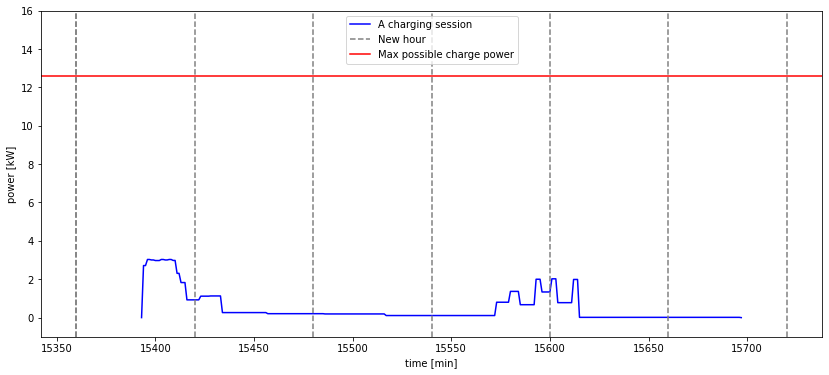

In [237]:
x  = EV1[15392:15697]["minute of year"].values
y1 = EV1[15392:15697]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.plot(x, y1, label='A charging session', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')
    
plt.axvline(x=15360, color='grey', linestyle='--', label='New hour')
    
plt.axhline(y=max(EV1["power(kW)"].values), label='Max possible charge power', color='red', linestyle='-')

# Displaying the legend
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.legend()
plt.ylim(-1, 16)

# title
# plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
#plt.grid(True)
plt.show()

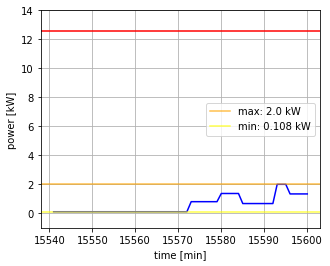

In [268]:
x  = EV1[15540:15600]["minute of year"].values
y1 = EV1[15540:15600]["power(kW)"].values

plt.figure(figsize=(5, 4))

plt.plot(x, y1, color='blue')

plt.axhline(y=max(EV1["power(kW)"].values), color='red', linestyle='-')

# Displaying the legend
plt.ylim(-1, 14)

# title
#plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# max values in a given hour
plt.axhline(y=max(EV1[15540:15600]['power(kW)'].values), color='orange', linestyle='-', alpha = 0.7, label="max: 2.0 kW")

# min values in a given hour
plt.axhline(y=min(EV1[15540:15600]['power(kW)'].values), color='yellow', linestyle='-', alpha = 0.7, label="min: 0.108 kW")

# grid
plt.grid(True)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.legend()
plt.show()

_____________________________________________________________________________________________________________________________

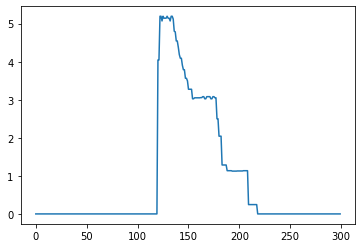

In [347]:
plt.plot(EV1[488800:489100]["power(kW)"].values);

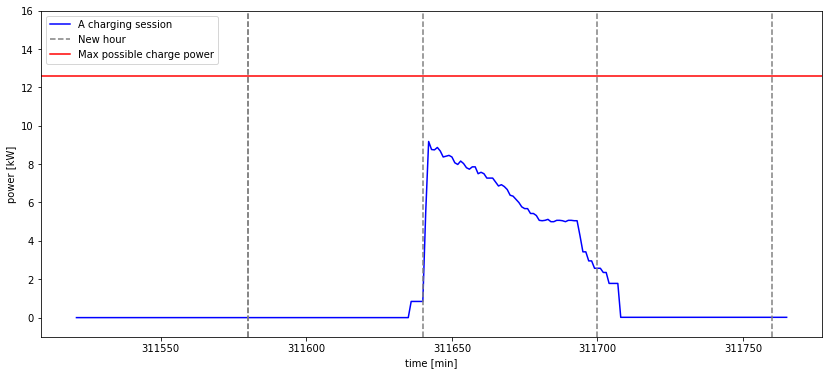

In [381]:
x  = EV1[311580:311780]["minute of year"].values
y1 = EV1[311580:311780]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.plot(x, y1, label='A charging session', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(311580, 311780, 60):
    plt.axvline(x=i, color='grey', linestyle='--')
    
plt.axvline(x=311580, color='grey', linestyle='--', label='New hour')
    
plt.axhline(y=max(EV1["power(kW)"].values), label='Max possible charge power', color='red', linestyle='-')

# Displaying the legend
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.legend()
plt.ylim(-1, 16)

# title
# plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
#plt.grid(True)
plt.show()

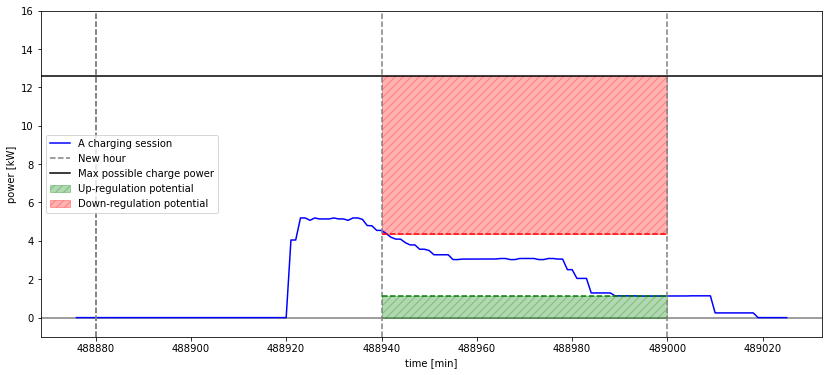

In [419]:
x  = EV1[488875:489025]["minute of year"].values
y1 = EV1[488875:489025]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.plot(x, y1, label='A charging session', color='blue')

# plotting horizontal x-axis
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, zorder=0)

# Plotting vertical hour lines at intervals of 60 min.
for i in range(488880, 489025, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

# plotting the first hour lines vertically in order to get a label
plt.axvline(x=488880, color='grey', linestyle='--', label='New hour')

# plotting horizontal max power line
plt.axhline(y=max(EV1["power(kW)"].values), label='Max possible charge power', color='black', linestyle='-')

# Plotting horizontal lines to mark potential bid-capacity limits
plt.axhline(y=min(EV1[488940:489000]["power(kW)"].values), xmin=0.437, xmax=0.8, color='green', linestyle='--')
plt.axhline(y=max(EV1[488940:489000]["power(kW)"].values), xmin=0.437, xmax=0.8, color='red', linestyle='--')

# fill in area between the lines
plt.fill_between(x, min(EV1[488940:489000]["power(kW)"].values), 0, where=(x > 488939) & (x < 489001), color='green', alpha=0.3, label='Up-regulation potential', hatch='///')
plt.fill_between(x, max(EV1["power(kW)"].values), max(EV1[488940:489000]["power(kW)"].values), where=(x > 488939) & (x < 489001), color='red', alpha=0.3, label='Down-regulation potential', hatch='///')

# Displaying the legend
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.legend(loc='center left')
plt.ylim(-1, 16)

# title
# plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
#plt.grid(True)
plt.show()

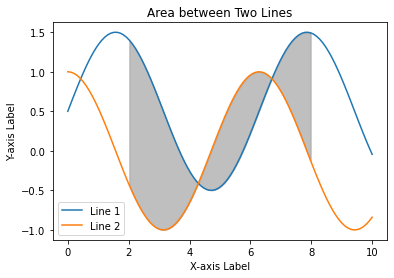

In [393]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
x = np.linspace(0, 10, 100)
y1 = np.sin(x) + 0.5
y2 = np.cos(x)

# Create a new figure
plt.figure()

# Plot the lines
plt.plot(x, y1, label='Line 1')
plt.plot(x, y2, label='Line 2')

# Fill the area between the lines
plt.fill_between(x, y1, y2, where=(x > 2) & (x < 8), color='gray', alpha=0.5)

# Label the axes
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Set the title of the plot
plt.title('Area between Two Lines')

# Display a legend
plt.legend()

# Display the plot
plt.show()


# plot 2

In [262]:
min(EV1[15540:15600]['power(kW)'].values)

0.10823812365604

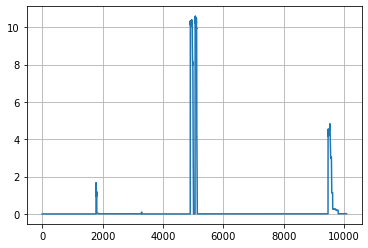

In [188]:
plt.plot(EV1[1440*0:1440*7]['power(kW)'].values)
plt.grid(True)
plt.show()

In [197]:
hey = copy.deepcopy(EV1[1440*7*0:1440*7*1]['power(kW)'].values)
hey2 = copy.deepcopy(EV1[1440*7*0:1440*7*1]['power(kW)'].values)

for i in range (2, 11):
    hey += EV1[1440*7*(i-1):1440*7*i]['power(kW)'].values
    
for i in range (2, 51):
    hey2 += EV1[1440*7*(i-1):1440*7*i]['power(kW)'].values

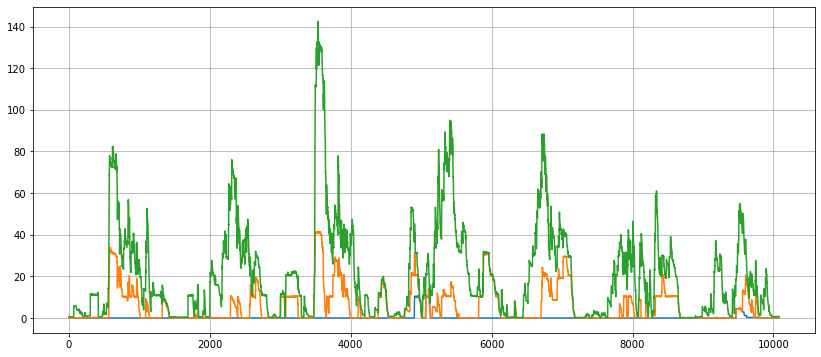

In [198]:
plt.figure(figsize=(14, 6))

plt.plot(EV1[1440*0:1440*7]['power(kW)'].values, label="1 charger")
plt.plot(hey, label="10 chargers")
plt.plot(hey2, label="50 chargers")
plt.grid(True)
plt.show()

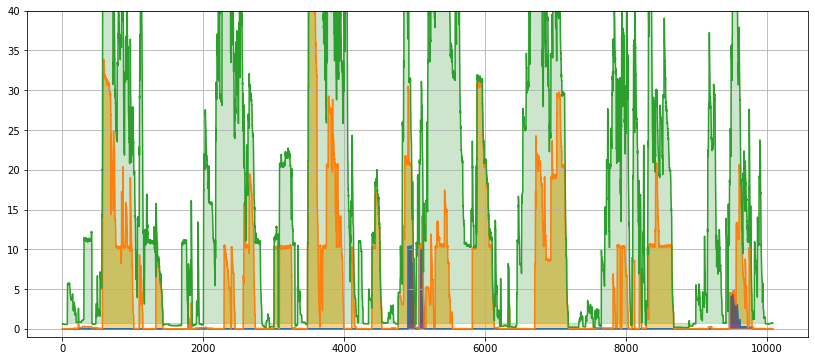

In [213]:
plt.figure(figsize=(14, 6))

plt.plot(EV1[1440*0:1440*7]['power(kW)'].values, label="1 charger")
plt.fill(EV1[1440*0:1440*7]['power(kW)'].values, color='blue', alpha=1)
plt.plot(hey, label="10 chargers")
plt.fill(hey, color='orange', alpha=0.5)
plt.plot(hey2, label="50 chargers")
plt.fill(hey2, color='green', alpha=0.2)
plt.grid(True)
plt.ylim(-1, 40)
plt.show()

In [9]:
import os
import glob
from fnmatch import fnmatch

sti = "C:/Users/ASUS/Documents/11. sem - kand/EV data/OneDrive_2023-09-11/Cleaned data/" # Erstatt med din faktiske sti

csv_filer = [os.path.join(sti, fil) for fil in os.listdir(sti) if fnmatch(fil, '*.csv')]

for csv_fil in csv_filer:
    print(csv_fil)
    
dataframes = [pd.read_csv(csv_fil) for csv_fil in csv_filer]


C:/Users/ASUS/Documents/11. sem - kand/EV data/OneDrive_2023-09-11/Cleaned data/CD_1544.csv
C:/Users/ASUS/Documents/11. sem - kand/EV data/OneDrive_2023-09-11/Cleaned data/CD_2067.csv
C:/Users/ASUS/Documents/11. sem - kand/EV data/OneDrive_2023-09-11/Cleaned data/CD_2113.csv
C:/Users/ASUS/Documents/11. sem - kand/EV data/OneDrive_2023-09-11/Cleaned data/CD_2181.csv
C:/Users/ASUS/Documents/11. sem - kand/EV data/OneDrive_2023-09-11/Cleaned data/CD_2187.csv
C:/Users/ASUS/Documents/11. sem - kand/EV data/OneDrive_2023-09-11/Cleaned data/CD_2188.csv
C:/Users/ASUS/Documents/11. sem - kand/EV data/OneDrive_2023-09-11/Cleaned data/CD_2220.csv
C:/Users/ASUS/Documents/11. sem - kand/EV data/OneDrive_2023-09-11/Cleaned data/CD_2222.csv
C:/Users/ASUS/Documents/11. sem - kand/EV data/OneDrive_2023-09-11/Cleaned data/CD_2225.csv
C:/Users/ASUS/Documents/11. sem - kand/EV data/OneDrive_2023-09-11/Cleaned data/CD_2226.csv
C:/Users/ASUS/Documents/11. sem - kand/EV data/OneDrive_2023-09-11/Cleaned data/

In [11]:
dataframes

[        energy_resovior (%)  SoC (kWh)  power(kW)  connected (1 or 0)   
 0                       0.0        0.0        0.0                 0.0  \
 1                       0.0        0.0        0.0                 0.0   
 2                       0.0        0.0        0.0                 0.0   
 3                       0.0        0.0        0.0                 0.0   
 4                       0.0        0.0        0.0                 0.0   
 ...                     ...        ...        ...                 ...   
 525595                  0.0        0.0        0.0                 0.0   
 525596                  0.0        0.0        0.0                 0.0   
 525597                  0.0        0.0        0.0                 0.0   
 525598                  0.0        0.0        0.0                 0.0   
 525599                  0.0        0.0        0.0                 0.0   
 
         max_effect of charger (kW)  minute of year  
 0                             14.4             1.0  
 1

In [14]:
print(dataframes[1].iloc[1])

energy_resovior (%)            0.00
SoC (kWh)                      0.00
power(kW)                      0.00
connected (1 or 0)             0.00
max_effect of charger (kW)    12.24
minute of year                 2.00
Name: 1, dtype: float64


In [20]:
print(dataframes[1].iloc[:, 2])

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
525595    0.0
525596    0.0
525597    0.0
525598    0.0
525599    0.0
Name: power(kW), Length: 525600, dtype: float64


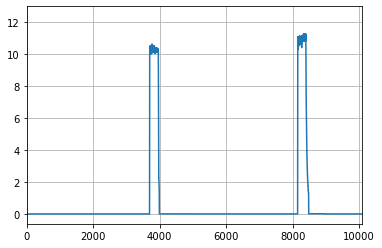

In [41]:
plt.plot(dataframes[4].iloc[:, 2].values)
plt.xlim(1440*7*0,1440*7*1)
plt.grid(True)
plt.show()

In [47]:
dataframes[0:3]

[        energy_resovior (%)  SoC (kWh)  power(kW)  connected (1 or 0)   
 0                       0.0        0.0        0.0                 0.0  \
 1                       0.0        0.0        0.0                 0.0   
 2                       0.0        0.0        0.0                 0.0   
 3                       0.0        0.0        0.0                 0.0   
 4                       0.0        0.0        0.0                 0.0   
 ...                     ...        ...        ...                 ...   
 525595                  0.0        0.0        0.0                 0.0   
 525596                  0.0        0.0        0.0                 0.0   
 525597                  0.0        0.0        0.0                 0.0   
 525598                  0.0        0.0        0.0                 0.0   
 525599                  0.0        0.0        0.0                 0.0   
 
         max_effect of charger (kW)  minute of year  
 0                             14.4             1.0  
 1

In [54]:
# Initialize a dataframe to hold the sums
sum_df = pd.DataFrame()

# Sum the columns across all dataframes
for df in dataframes:
    sum_df = sum_df.add(df, fill_value=0)

# Display the resulting dataframe
print(sum_df)

        energy_resovior (%)  SoC (kWh)  power(kW)  connected (1 or 0)   
0                       0.0        0.0        0.0                 0.0  \
1                       0.0        0.0        0.0                 0.0   
2                       0.0        0.0        0.0                 0.0   
3                       0.0        0.0        0.0                 0.0   
4                       0.0        0.0        0.0                 0.0   
...                     ...        ...        ...                 ...   
525595                  0.0        0.0        0.0                 0.0   
525596                  0.0        0.0        0.0                 0.0   
525597                  0.0        0.0        0.0                 0.0   
525598                  0.0        0.0        0.0                 0.0   
525599                  0.0        0.0        0.0                 0.0   

        max_effect of charger (kW)  minute of year  
0                         4026.385           247.0  
1                

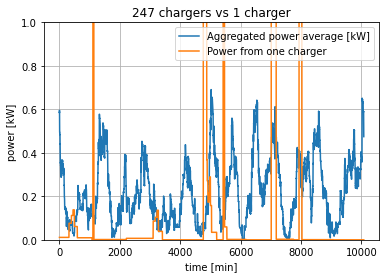

In [89]:
plt.plot(sum_df[1440*7*3:1440*7*4]['power(kW)'].values/247, label='Aggregated power average [kW]')
plt.plot(EV1[1440*7*3:1440*7*4]['power(kW)'].values, label='Power from one charger')
plt.ylim(0,1)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.title("247 chargers vs 1 charger")
plt.legend()
plt.grid(True)
plt.show()

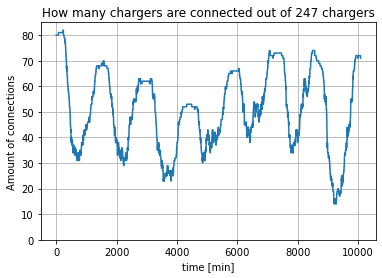

In [94]:
plt.plot(sum_df[1440*7*3:1440*7*4]['connected (1 or 0)'].values)
plt.ylim(0,85)
plt.xlabel('time [min]')
plt.ylabel('Amount of connections')
plt.title("How many chargers are connected out of 247 chargers")
plt.grid(True)
plt.show()

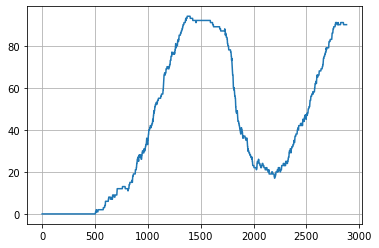

In [74]:
plt.plot(sum_df[1440*7*0:1440*2]['power(kW)'].values)
plt.grid(True)
plt.show()